In [ ]:
#download java 
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download Apache Spark 3.0.2 with Hadoop 2.7 #check this link to download the latest spark version: https://downloads.apache.org/spark/spark-3.1.2/
#Note – At the time of writing this article, 3.0.2 was the latest version of Apache Spark. But Spark is developing quite rapidly. So, if there is a newer version of Spark when you are executing this code, then you just need to replace 3.0.2, wherever you see it, with the latest version.
!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
#check the content 
!ls

sample_data  spark-3.1.2-bin-hadoop2.7.tgz


In [ ]:
#unzip the folder 
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
# install pyspark library.  It will locate Spark on the system and import it as a regular library.
!pip install -q findspark
#set the environment path
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"
# locate Spark in the system
import findspark
findspark.init()

In [ ]:
#location of the install spark file
findspark.find()

'/content/spark-3.1.2-bin-hadoop2.7'

In [ ]:
#create a spark session 
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
spark.conf.set("mapreduce.fileoutputcommitter.algorithm.version", "2")


In [ ]:
#print the spark session variable 
spark

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2021-08-17 15:24:05--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 50.16.95.25, 52.44.51.219, 52.4.53.8, ...
Connecting to bin.equinox.io (bin.equinox.io)|50.16.95.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  53.6MB/s    in 0.2s    

2021-08-17 15:24:05 (53.6 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13832437/13832437]



In [ ]:
#list files in the directory 
!ls

gdrive				sample_data
ngrok				spark-3.1.2-bin-hadoop2.7
ngrok-stable-linux-amd64.zip	spark-3.1.2-bin-hadoop2.7.tgz
ngrok-stable-linux-amd64.zip.1


In [ ]:
#unzip web server 
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 4050 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels

{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://9072885297d3.ngrok.io","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}},{"name":"command_line (http)","uri":"/api/tunnels/command_line%20%28http%29","public_url":"http://9072885297d3.ngrok.io","proto":"http","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}}],"uri":"/api/tunnels"}


In [ ]:
#spark installation test
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])
df.show(3, False)

+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+
only showing top 3 rows



In [ ]:

# Check the pyspark version
import pyspark
print(pyspark.__version__)

3.1.2


In [ ]:
#mount drive in colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Udacity
#Check the present working directory using pwd command
%pwd

/content/gdrive/My Drive/Udacity


'/content/gdrive/My Drive/Udacity'

In [ ]:
#load all the libraries 
import sys, os
import zipfile
import requests
from multiprocessing import Pool, cpu_count
from functools import partial
from io import BytesIO

In [ ]:
# dowload data from "https://s3.amazonaws.com/capitalbikeshare-data/index.html"
import sys, os
import zipfile
import requests
from multiprocessing import Pool, cpu_count
from functools import partial
from io import BytesIO


def download_zip(url, filePath):
    try:
        file_name = url.split("/")[-1]
        response = requests.get(url)
        sourceZip = zipfile.ZipFile(BytesIO(response.content))
        print(" Downloaded {} ".format(file_name))
        sourceZip.extractall(filePath)
        print(" extracted {}".format(file_name))
        sourceZip.close()
    except Exception as e:
        print(e)

url_2010_2017 = []
#create links to download the zip file from 2010 to 2017. Until 2017, every year has one zip folder, each folder has four files of each quarter of the year. 
for i in range(2010,2018,1):
  url_2010_2017.append("https://s3.amazonaws.com/capitalbikeshare-data/"+str(i)+ "-capitalbikeshare-tripdata.zip")

#download and extract zip files
for url in url_2010_2017:
  download_zip(url,"//content/gdrive/My Drive/Udacity")

#create downloadable links from 2018 to 2021. These recent years have a file for each month of the year. 
url_2018_2021 = []
for i in range (2018,2022,1):
  for j in range(1,13,1):
    if j<10:
      url_2018_2021.append("https://s3.amazonaws.com/capitalbikeshare-data/"+str(i)+str(0)+str(j)+"-capitalbikeshare-tripdata.zip")
    else:
      #October, November and December do not have a leading zero in the link 
      url_2018_2021.append("https://s3.amazonaws.com/capitalbikeshare-data/"+str(i)+str(j)+"-capitalbikeshare-tripdata.zip")


#download and execute the files. In this S3 bucket, we have data till may 2021. However, in the previous iteration, we have created link upto December 2021. That's why we have used subset of those created links.  
for url in url_2018_2021[:41]:
  download_zip(url,"/content/gdrive/My Drive/Udacity")


 Downloaded 2010-capitalbikeshare-tripdata.zip 
 extracted 2010-capitalbikeshare-tripdata.zip
 Downloaded 2011-capitalbikeshare-tripdata.zip 
 extracted 2011-capitalbikeshare-tripdata.zip
 Downloaded 2012-capitalbikeshare-tripdata.zip 


KeyboardInterrupt: ignored

In [ ]:
#get a list of the downloaded file 
!ls

2010-capitalbikeshare-tripdata.csv    201809-capitalbikeshare-tripdata.csv
2011-capitalbikeshare-tripdata.csv    201810-capitalbikeshare-tripdata.csv
2012Q1-capitalbikeshare-tripdata.csv  201811-capitalbikeshare-tripdata.csv
2012Q2-capitalbikeshare-tripdata.csv  201812-capitalbikeshare-tripdata.csv
2012Q3-capitalbikeshare-tripdata.csv  201901-capitalbikeshare-tripdata.csv
2012Q4-capitalbikeshare-tripdata.csv  201902-capitalbikeshare-tripdata.csv
2013Q1-capitalbikeshare-tripdata.csv  201903-capitalbikeshare-tripdata.csv
2013Q2-capitalbikeshare-tripdata.csv  201904-capitalbikeshare-tripdata.csv
2013Q3-capitalbikeshare-tripdata.csv  201905-capitalbikeshare-tripdata.csv
2013Q4-capitalbikeshare-tripdata.csv  201906-capitalbikeshare-tripdata.csv
2014Q1-capitalbikeshare-tripdata.csv  201907-capitalbikeshare-tripdata
2014Q2-capitalbikeshare-tripdata.csv  201908-capitalbikeshare-tripdata.csv
2014Q3-capitalbikeshare-tripdata.csv  201909-capitalbikeshare-tripdata.csv
2014Q4-capitalbikeshare-tripd

In [ ]:
# check the count of one of the downloaded files
tripdata_2010 =spark.read.csv('/content/gdrive/My Drive/Udacity/2010-capitalbikeshare-tripdata.csv', header=True, mode="DROPMALFORMED")
tripdata_2010.count()

115597

In [ ]:
tripdata_2010.printSchema()

root
 |-- Duration: string (nullable = true)
 |-- Start date: string (nullable = true)
 |-- End date: string (nullable = true)
 |-- Start station number: string (nullable = true)
 |-- Start station: string (nullable = true)
 |-- End station number: string (nullable = true)
 |-- End station: string (nullable = true)
 |-- Bike number: string (nullable = true)
 |-- Member type: string (nullable = true)



In [ ]:
tripdata_2011 =spark.read.csv('/content/gdrive/My Drive/Udacity/2011-capitalbikeshare-tripdata.csv', header=True, mode="DROPMALFORMED")
tripdata_2011.count()

1226767

In [ ]:
tripdata_2011.printSchema()

root
 |-- Duration: string (nullable = true)
 |-- Start date: string (nullable = true)
 |-- End date: string (nullable = true)
 |-- Start station number: string (nullable = true)
 |-- Start station: string (nullable = true)
 |-- End station number: string (nullable = true)
 |-- End station: string (nullable = true)
 |-- Bike number: string (nullable = true)
 |-- Member type: string (nullable = true)



In [ ]:
tripdata_202101 =spark.read.csv('/content/gdrive/My Drive/Udacity/202101-capitalbikeshare-tripdata.csv', header=True, mode="DROPMALFORMED")
tripdata_202101.count()

100070

In [ ]:
tripdata_202101.printSchema()

root
 |-- ride_id: string (nullable = true)
 |-- rideable_type: string (nullable = true)
 |-- started_at: string (nullable = true)
 |-- ended_at: string (nullable = true)
 |-- start_station_name: string (nullable = true)
 |-- start_station_id: string (nullable = true)
 |-- end_station_name: string (nullable = true)
 |-- end_station_id: string (nullable = true)
 |-- start_lat: string (nullable = true)
 |-- start_lng: string (nullable = true)
 |-- end_lat: string (nullable = true)
 |-- end_lng: string (nullable = true)
 |-- member_casual: string (nullable = true)



In [ ]:
import os 
os.listdir()

['2010-capitalbikeshare-tripdata.csv',
 '2011-capitalbikeshare-tripdata.csv',
 '2012Q1-capitalbikeshare-tripdata.csv',
 '2012Q2-capitalbikeshare-tripdata.csv',
 '2012Q3-capitalbikeshare-tripdata.csv',
 '2012Q4-capitalbikeshare-tripdata.csv',
 '2013Q1-capitalbikeshare-tripdata.csv',
 '2013Q2-capitalbikeshare-tripdata.csv',
 '2013Q3-capitalbikeshare-tripdata.csv',
 '2013Q4-capitalbikeshare-tripdata.csv',
 '2014Q1-capitalbikeshare-tripdata.csv',
 '2014Q2-capitalbikeshare-tripdata.csv',
 '2014Q3-capitalbikeshare-tripdata.csv',
 '2014Q4-capitalbikeshare-tripdata.csv',
 '2015Q1-capitalbikeshare-tripdata.csv',
 '2015Q2-capitalbikeshare-tripdata.csv',
 '2015Q3-capitalbikeshare-tripdata.csv',
 '2015Q4-capitalbikeshare-tripdata.csv',
 '2016Q1-capitalbikeshare-tripdata.csv',
 '2016Q2-capitalbikeshare-tripdata.csv',
 '2016Q3-capitalbikeshare-tripdata.csv',
 '2016Q4-capitalbikeshare-tripdata.csv',
 '2017Q1-capitalbikeshare-tripdata.csv',
 '2017Q2-capitalbikeshare-tripdata.csv',
 '2017Q3-capitalbike

In [ ]:
# rename a file which does not have csv extenion 
os.rename('201907-capitalbikeshare-tripdata','201907-capitalbikeshare-tripdata.csv') 

In [ ]:
os.listdir()

['2010-capitalbikeshare-tripdata.csv',
 '2011-capitalbikeshare-tripdata.csv',
 '2012Q1-capitalbikeshare-tripdata.csv',
 '2012Q2-capitalbikeshare-tripdata.csv',
 '2012Q3-capitalbikeshare-tripdata.csv',
 '2012Q4-capitalbikeshare-tripdata.csv',
 '2013Q1-capitalbikeshare-tripdata.csv',
 '2013Q2-capitalbikeshare-tripdata.csv',
 '2013Q3-capitalbikeshare-tripdata.csv',
 '2013Q4-capitalbikeshare-tripdata.csv',
 '2014Q1-capitalbikeshare-tripdata.csv',
 '2014Q2-capitalbikeshare-tripdata.csv',
 '2014Q3-capitalbikeshare-tripdata.csv',
 '2014Q4-capitalbikeshare-tripdata.csv',
 '2015Q1-capitalbikeshare-tripdata.csv',
 '2015Q2-capitalbikeshare-tripdata.csv',
 '2015Q3-capitalbikeshare-tripdata.csv',
 '2015Q4-capitalbikeshare-tripdata.csv',
 '2016Q1-capitalbikeshare-tripdata.csv',
 '2016Q2-capitalbikeshare-tripdata.csv',
 '2016Q3-capitalbikeshare-tripdata.csv',
 '2016Q4-capitalbikeshare-tripdata.csv',
 '2017Q1-capitalbikeshare-tripdata.csv',
 '2017Q2-capitalbikeshare-tripdata.csv',
 '2017Q3-capitalbike

In [ ]:
#check whether all files have same schema or not 
all_files = os.listdir()

for i in all_files:
  print(i)
  df = spark.read.csv("/content/gdrive/My Drive/Udacity/"+i,header=True, mode="DROPMALFORMED")
  print(df.count())
  df.printSchema()
  


2010-capitalbikeshare-tripdata.csv
115597
root
 |-- Duration: string (nullable = true)
 |-- Start date: string (nullable = true)
 |-- End date: string (nullable = true)
 |-- Start station number: string (nullable = true)
 |-- Start station: string (nullable = true)
 |-- End station number: string (nullable = true)
 |-- End station: string (nullable = true)
 |-- Bike number: string (nullable = true)
 |-- Member type: string (nullable = true)

2011-capitalbikeshare-tripdata.csv
1226767
root
 |-- Duration: string (nullable = true)
 |-- Start date: string (nullable = true)
 |-- End date: string (nullable = true)
 |-- Start station number: string (nullable = true)
 |-- Start station: string (nullable = true)
 |-- End station number: string (nullable = true)
 |-- End station: string (nullable = true)
 |-- Bike number: string (nullable = true)
 |-- Member type: string (nullable = true)

2012Q1-capitalbikeshare-tripdata.csv
361317
root
 |-- Duration: string (nullable = true)
 |-- Start date: s

In [ ]:
# two observations
# April, 2020 Data is not available. Most likely due to country-wide covid lockdown
# Schema is different from May, 2021

In [ ]:
import shutil, os
#move all the newer files from may 2020 which have a new schema in new directory 
os.mkdir("//content/gdrive/My Drive/Udacity/new")

for f in all_files[-13:]:
    shutil.move(f, '//content/gdrive/My Drive/Udacity/new')


In [ ]:
# move all the older files with old schema until march 2020 in old directory 
os.mkdir("//content/gdrive/My Drive/Udacity/old")

for f in all_files[:-13]:
    shutil.move(f, '//content/gdrive/My Drive/Udacity/old')

In [ ]:
TRIP_DATA_FOLDER = "./gdrive/My Drive/Udacity/"
TRIP_DATA_PATHS_NEW = os.path.join(TRIP_DATA_FOLDER, "new/*.csv")
TRIP_DATA_PATHS_OLD = os.path.join(TRIP_DATA_FOLDER, "old/*.csv")

In [ ]:
TRIP_DATA_PATHS_NEW

'./gdrive/My Drive/Udacity/new/*.csv'

In [ ]:
#read all the csvs in the new folder and store it to a dataframe 
from pyspark.sql.types import (
    BooleanType, DateType, DoubleType, IntegerType, LongType, StringType, StructField, StructType, TimestampType
)
from pyspark.sql import functions as F

import matplotlib.pyplot as plt

trip_data_new_schema = StructType([
    StructField('ride_id', StringType()),
    StructField('rideable_type', StringType()),
    StructField('started_at', TimestampType()),
    StructField('ended_at', TimestampType()),
    StructField('start_station_name', StringType()),
    StructField('start_station_id', StringType()),
    StructField('end_station_name', StringType()),
    StructField('end_station_id', LongType()),
    StructField('start_lat', DoubleType()),
    StructField('start_lng', DoubleType()),
    StructField('end_lat', DoubleType()),
    StructField('end_lng', DoubleType()),
    StructField("member_casual", StringType())
])

trip_data_new = spark.read.csv(TRIP_DATA_PATHS_NEW, header=True, schema=trip_data_new_schema)
trip_data_new.show(5)

trip_data_new.printSchema()

print("Total number new records: ", trip_data_new.count())

+----------------+-------------+-------------------+-------------------+--------------------+----------------+--------------------+--------------+------------------+------------------+-----------------+----------+-------------+
|         ride_id|rideable_type|         started_at|           ended_at|  start_station_name|start_station_id|    end_station_name|end_station_id|         start_lat|         start_lng|          end_lat|   end_lng|member_casual|
+----------------+-------------+-------------------+-------------------+--------------------+----------------+--------------------+--------------+------------------+------------------+-----------------+----------+-------------+
|1302CB1BFE4F8E3D|electric_bike|2021-05-22 10:58:32|2021-05-22 11:26:44|Lincoln Park / 13...|           31619|Potomac & Pennsyl...|         31606|38.890450333333334|-76.98834816666667|38.88035983333333|-76.986171|       member|
|03C23D7BE25C6958| classic_bike|2021-05-15 17:01:17|2021-05-15 17:09:05|Lincoln Park / 1

In [ ]:
#read all the csvs in the old folder and store it to a dataframe 
trip_data_old_schema = StructType([
    StructField('Duration', DoubleType()),
    StructField('Start date', TimestampType()),
    StructField('End date', TimestampType()),
    StructField('Start station number', StringType()),
    StructField('Start station', StringType()),
    StructField('End station number', StringType()),
    StructField('End station', StringType()),
    StructField('Bike number', StringType()),
    StructField("Member type", StringType())
])

trip_data_old = spark.read.csv(TRIP_DATA_PATHS_OLD, header=True, schema=trip_data_old_schema)
trip_data_old.show(5)

trip_data_old.printSchema()

print("Total number of old records: ", trip_data_old.count())

+--------+-------------------+-------------------+--------------------+--------------------+------------------+--------------------+-----------+-----------+
|Duration|         Start date|           End date|Start station number|       Start station|End station number|         End station|Bike number|Member type|
+--------+-------------------+-------------------+--------------------+--------------------+------------------+--------------------+-----------+-----------+
|  3548.0|2011-01-01 00:01:29|2011-01-01 01:00:37|               31620|       5th & F St NW|             31620|       5th & F St NW|     W00247|     Member|
|   346.0|2011-01-01 00:02:46|2011-01-01 00:08:32|               31105|14th & Harvard St NW|             31101|      14th & V St NW|     W00675|     Casual|
|   562.0|2011-01-01 00:06:13|2011-01-01 00:15:36|               31400|Georgia & New Ham...|             31104|Adams Mill & Colu...|     W00357|     Member|
|   434.0|2011-01-01 00:09:21|2011-01-01 00:16:36|        

In [ ]:
import os.path as osp
from datetime import datetime

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import (
    BooleanType, DateType, DoubleType, IntegerType, LongType, StringType, StructField, StructType, TimestampType
)
from pyspark.sql import functions as F

import matplotlib.pyplot as plt

In [ ]:
# create a new station dataframe of all stations from old schema and new schema  
station_data = trip_data_old.select(F.col("Start station number").alias("station_id"),
                                    F.col("Start station").alias("station_name")).distinct().union(
    trip_data_old.select("End station number", "End station").distinct()).union(
    trip_data_new.select("start_station_id", "start_station_name").distinct()).union(
    trip_data_new.select("end_station_id", "end_station_name").distinct()).distinct().sort("station_id", ascending=True).dropna(
    how="any", subset=["station_id"]).filter(F.col("station_id") != "00000").dropDuplicates(subset=["station_id"])

print("Total number of stations: ", station_data.count())

station_data.show(5, truncate=False)

station_data.printSchema()

Total number of stations:  641
+----------+------------------------------------------+
|station_id|station_name                              |
+----------+------------------------------------------+
|31000     |Eads St & 15th St S                       |
|31001     |18th & Eads St.                           |
|31002     |20th & Crystal Dr                         |
|31003     |Crystal Dr & 15th St S                    |
|31004     |Aurora Hills Community Ctr/18th & Hayes St|
+----------+------------------------------------------+
only showing top 5 rows

root
 |-- station_id: string (nullable = true)
 |-- station_name: string (nullable = true)



In [ ]:
# create a new trips dataframe of all trips data from old schema and new schema  
trip_data = trip_data_old.select(F.lit(None).alias("ride_id").cast(StringType()),
                                 F.lit(None).alias("rideable_type").cast(StringType()),
                                 F.col("Start date").alias("started_at"),
                                 F.col("End date").alias("ended_at"),
                                 F.col("Start station number").alias("start_station_id"),
                                 F.col("End station number").alias("end_station_id"),
                                 F.col("Member type").alias("member_casual")).union(
    trip_data_new.select("ride_id", "rideable_type", "started_at", "ended_at", "start_station_id", "end_station_id", "member_casual"))


# Clean up.
trip_data = trip_data.dropna(how="any", subset=["start_station_id", "end_station_id"]).filter(
    (F.col("start_station_id") != "00000") & (F.col("end_station_id") != "00000"))

# Add primary key "tid" and foreign key "start_date".
# FIXME: monotonically_increase_id() does not return a sequence!
trip_data = trip_data.withColumn("tid", F.monotonically_increasing_id()).withColumn("start_date", F.to_date(F.col("started_at")))

print("Total number of records: ", trip_data.count())

trip_data.show(5)

trip_data.printSchema()

Total number of records:  28776080
+-------+-------------+-------------------+-------------------+----------------+--------------+-------------+---+----------+
|ride_id|rideable_type|         started_at|           ended_at|start_station_id|end_station_id|member_casual|tid|start_date|
+-------+-------------+-------------------+-------------------+----------------+--------------+-------------+---+----------+
|   null|         null|2011-01-01 00:01:29|2011-01-01 01:00:37|           31620|         31620|       Member|  0|2011-01-01|
|   null|         null|2011-01-01 00:02:46|2011-01-01 00:08:32|           31105|         31101|       Casual|  1|2011-01-01|
|   null|         null|2011-01-01 00:06:13|2011-01-01 00:15:36|           31400|         31104|       Member|  2|2011-01-01|
|   null|         null|2011-01-01 00:09:21|2011-01-01 00:16:36|           31111|         31503|       Member|  3|2011-01-01|
|   null|         null|2011-01-01 00:28:26|2011-01-01 00:32:19|           31104|         3

In [ ]:
#create an ouput directory to store processed table data 
os.mkdir("//content/gdrive/My Drive/Udacity/output_data")

In [ ]:
 #set the outpur directory 
 output_data_dir = '/content/gdrive/My Drive/Udacity/output_data/'

    # write songs table to parquet files partitioned by year and artist
station_data_out_path = str(output_data_dir  + 'station_data.parquet')
station_data.write.parquet(station_data_out_path, mode='overwrite')

    # write artists table to parquet files
trip_data_out_path = str(output_data_dir + 'trip_data.parquet')
trip_data.write.parquet(trip_data_out_path, mode='overwrite', partitionBy=['start_station_id'])

In [ ]:
#check the file creation 
!ls /content/gdrive/My Drive/Udacity/output_data

ls: cannot access '/content/gdrive/My': No such file or directory
ls: cannot access 'Drive/Udacity/output_data': No such file or directory


In [ ]:
!mv '/content/output_data/trip_data.parquet' '/content/gdrive/My Drive/Kaggle Data'

In [ ]:
import json
import requests
  
# store the URL in url as 
# parameter for urlopen
url = "https://api.covidtracking.com/v1/states/daily.json"
  
# store the response of URL
response = requests.get(url)
  
# storing the JSON response 
# from url in data
data_json = json.loads(response.text)
  


In [ ]:
data_json == response.json()
type(data_json)
data_json[:10]

[{'checkTimeEt': '03/04 22:59',
  'commercialScore': 0,
  'dataQualityGrade': None,
  'date': 20210307,
  'dateChecked': '2021-03-05T03:59:00Z',
  'dateModified': '2021-03-05T03:59:00Z',
  'death': 305,
  'deathConfirmed': None,
  'deathIncrease': 0,
  'deathProbable': None,
  'fips': '02',
  'grade': '',
  'hash': 'dc4bccd4bb885349d7e94d6fed058e285d4be164',
  'hospitalized': 1293,
  'hospitalizedCumulative': 1293,
  'hospitalizedCurrently': 33,
  'hospitalizedDischarged': None,
  'hospitalizedIncrease': 0,
  'inIcuCumulative': None,
  'inIcuCurrently': None,
  'lastUpdateEt': '3/5/2021 03:59',
  'negative': None,
  'negativeIncrease': 0,
  'negativeRegularScore': 0,
  'negativeScore': 0,
  'negativeTestsAntibody': None,
  'negativeTestsPeopleAntibody': None,
  'negativeTestsViral': 1660758,
  'onVentilatorCumulative': None,
  'onVentilatorCurrently': 2,
  'pending': None,
  'posNeg': 56886,
  'positive': 56886,
  'positiveCasesViral': None,
  'positiveIncrease': 0,
  'positiveScore': 

In [ ]:
sc= spark.sparkContext
df = sc.parallelize(data_json).map(lambda x: json.dumps(x))
df = spark.read.json(df)

In [ ]:
df.show(5)

+-----------+---------------+----------------+--------+--------------------+--------------------+-----+--------------+-------------+-------------+----+-----+--------------------+------------+----------------------+---------------------+----------------------+--------------------+---------------+--------------+---------------+--------+----------------+--------------------+-------------+---------------------+---------------------------+------------------+----------------------+---------------------+-------+-------+--------+------------------+----------------+-------------+---------------------+--------------------+---------------------------+--------------------------+------------------+-------------+---------+-----+-----+-------+------------------------+----------------+------------------------+----------------------+------------------+-----------------+------------------------+-----------------------+---------------------+---------------+
|checkTimeEt|commercialScore|dataQualityGrade| 

In [ ]:
# Select only interested columns
covid_data = df.select(
    "dataQualityGrade", "date",  "death", "deathIncrease", "hospitalizedCurrently", "hospitalizedDischarged", "hospitalizedIncrease", 
    "positive", "positiveIncrease", "recovered", "state")

print("Total number records: ", covid_data.count())

# Select only data from Washington DC
covid_data = covid_data.filter(F.col("state") == "DC").drop("state")

covid_data.show(5)

covid_data.printSchema()

Total number records:  20780
+----------------+--------+-----+-------------+---------------------+----------------------+--------------------+--------+----------------+---------+
|dataQualityGrade|    date|death|deathIncrease|hospitalizedCurrently|hospitalizedDischarged|hospitalizedIncrease|positive|positiveIncrease|recovered|
+----------------+--------+-----+-------------+---------------------+----------------------+--------------------+--------+----------------+---------+
|            null|20210307| 1030|            0|                  150|                  null|                   0|   41419|             146|    29570|
|            null|20210306| 1030|            3|                  150|                  null|                   0|   41273|             151|    29470|
|            null|20210305| 1027|            3|                  160|                  null|                   0|   41122|             108|    29417|
|            null|20210304| 1024|            1|                  170|  

In [ ]:
covid_data.select("dataQualityGrade", "hospitalizedDischarged", "hospitalizedIncrease").distinct().show()

+----------------+----------------------+--------------------+
|dataQualityGrade|hospitalizedDischarged|hospitalizedIncrease|
+----------------+----------------------+--------------------+
|            null|                  null|                   0|
+----------------+----------------------+--------------------+



In [ ]:
covid_data = covid_data.drop("dataQualityGrade", "hospitalizedDischarged", "hospitalizedIncrease")

covid_data.show(5)

+--------+-----+-------------+---------------------+--------+----------------+---------+
|    date|death|deathIncrease|hospitalizedCurrently|positive|positiveIncrease|recovered|
+--------+-----+-------------+---------------------+--------+----------------+---------+
|20210307| 1030|            0|                  150|   41419|             146|    29570|
|20210306| 1030|            3|                  150|   41273|             151|    29470|
|20210305| 1027|            3|                  160|   41122|             108|    29417|
|20210304| 1024|            1|                  170|   41014|             196|    29287|
|20210303| 1023|            4|                  177|   40818|              51|    29213|
+--------+-----+-------------+---------------------+--------+----------------+---------+
only showing top 5 rows



In [ ]:
#Convert type of column "date" from long to date.
func =  F.udf(lambda x: datetime.strptime(str(x), '%Y%m%d'), DateType())

covid_data = covid_data.withColumn("date", func(F.col("date")))
covid_data.orderBy("date").show(5)

covid_data.printSchema()

+----------+-----+-------------+---------------------+--------+----------------+---------+
|      date|death|deathIncrease|hospitalizedCurrently|positive|positiveIncrease|recovered|
+----------+-----+-------------+---------------------+--------+----------------+---------+
|2020-03-05| null|            0|                 null|       0|               0|     null|
|2020-03-06| null|            0|                 null|       0|               0|     null|
|2020-03-07| null|            0|                 null|       0|               0|     null|
|2020-03-08| null|            0|                 null|       1|               1|     null|
|2020-03-09| null|            0|                 null|       1|               0|     null|
+----------+-----+-------------+---------------------+--------+----------------+---------+
only showing top 5 rows

root
 |-- date: date (nullable = true)
 |-- death: long (nullable = true)
 |-- deathIncrease: long (nullable = true)
 |-- hospitalizedCurrently: long (nulla

In [ ]:
covid_data = covid_data.fillna(0).orderBy("date")

In [ ]:
covid_data = covid_data.filter(F.col("state") == "DC").drop("state")

In [ ]:
print("Before dropDuplicates: ", covid_data.count())
covid_data = covid_data.dropDuplicates(["date"])
print("After dropDuplicates: ", covid_data.count())

Before dropDuplicates:  368
After dropDuplicates:  368


In [ ]:
#set the outpur directory 
output_data_dir = '/content/gdrive/My Drive/Udacity/output_data/'
covid_data.write.mode("overwrite").parquet(
        osp.join(output_data_dir, "covid_data"))

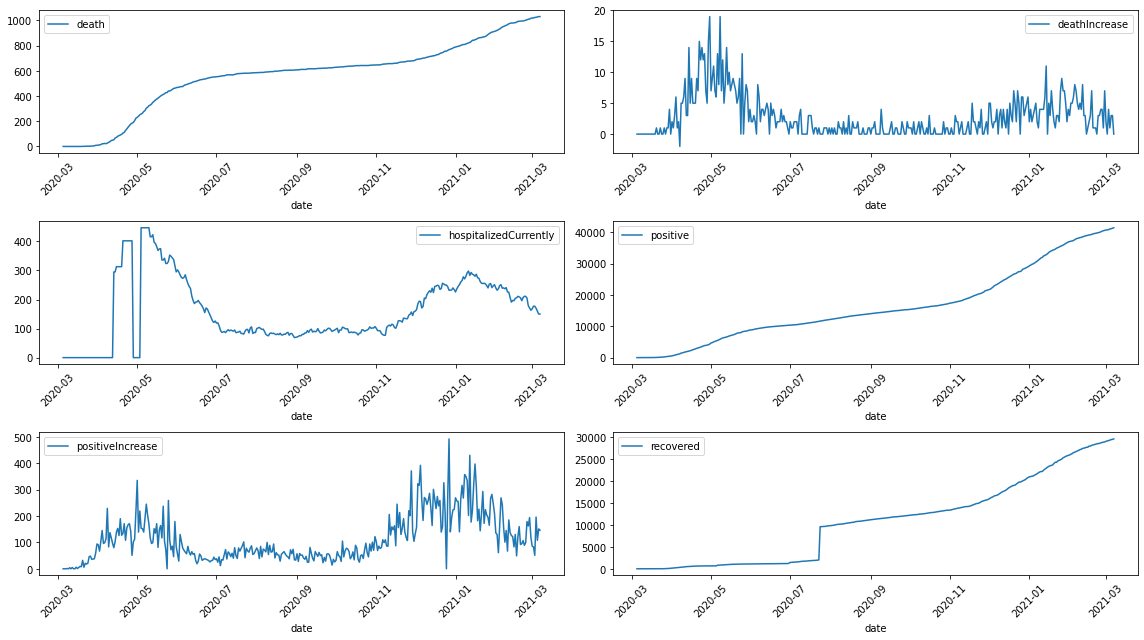

In [ ]:

covid_df = covid_data.toPandas()

_, axes = plt.subplots(3, 2, figsize=(16, 9))

for col, ax in zip(list(covid_df.columns[1:]), axes.flatten()):
    covid_df.plot("date", col, ax=ax)
    ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()

In [ ]:
!ls


new  old  Weather_data_2018_2021_washington_DC.csv


In [ ]:
#read and process the weather data 
WEATHER_DATA_PATH = "/content/gdrive/My Drive/Kaggle Data/Weather_data_2011_2021.csv"
weather_data_schema = StructType([
    StructField('DATE', StringType()),
    StructField('AWND', DoubleType()),
    StructField('FMTM', DoubleType()),
    StructField('PGTM', DoubleType()),
    StructField('PRCP', DoubleType()),
    StructField('SNOW', DoubleType()),
    StructField('SNWD', DoubleType()),
    StructField('TAVG', DoubleType()),
    StructField('TMAX', DoubleType()),
    StructField('TMIN', DoubleType()),
    StructField('WDF2', DoubleType()),
    StructField('WDF5', DoubleType()),  
    StructField('WSF2', DoubleType()),
    StructField('WSF5', DoubleType()),
    StructField('WT01', StringType()),
    StructField('WT02', StringType()), 
    StructField('WT03', StringType()), 
    StructField('WT04', StringType()), 
    StructField('WT05', StringType()), 
    StructField('WT06', StringType()), 
    StructField('WT08', StringType()), 
    StructField('WT09', StringType()),
    StructField('WT11', StringType()),
    StructField('WT13', StringType()),
    StructField('WT14', StringType()),
    StructField('WT15', StringType()),
    StructField('WT16', StringType()),
    StructField('WT17', StringType()),
    StructField('WT18', StringType()),
    StructField('WT21', StringType()),
    StructField('WT22', StringType())
])

weather_data = spark.read.csv(WEATHER_DATA_PATH, header=True, schema=weather_data_schema,  dateFormat="MMddyyyy").drop(
    "FMTM","PGTM","SNWD","WDF2","WDF5","WSF2","WSF5"
)

weather_data.show(5)

print("Total number records: ", weather_data.count())

+--------+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|    DATE| AWND|PRCP|SNOW|TAVG|TMAX|TMIN|WT01|WT02|WT03|WT04|WT05|WT06|WT08|WT09|WT11|WT13|WT14|WT15|WT16|WT17|WT18|WT21|WT22|
+--------+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|1/1/2011| 7.16|0.01| 0.0|null|58.0|34.0|   1|null|null|null|null|null|   1|null|null|   1|null|null|   1|null|null|null|null|
|1/2/2011|10.96|0.06| 0.0|null|59.0|34.0|   1|null|null|null|null|null|null|null|null|   1|null|null|   1|null|null|null|null|
|1/3/2011|10.29| 0.0| 0.0|null|41.0|28.0|null|null|null|null|null|null|null|null|null|null|null|null|null|null|null|null|null|
|1/4/2011| 6.49| 0.0| 0.0|null|43.0|25.0|null|null|null|null|null|null|null|null|null|null|null|null|null|null|null|null|null|
|1/5/2011|  8.5| 0.0| 0.0|null|43.0|31.0|null|null|null|null|null|null|null|null|null|null|null|null|null|null|

In [ ]:
#filter, process and create a weather dataframe 
weather_data = weather_data.filter(F.col("AWND").isNotNull()).filter(F.col("TAVG").isNotNull()).filter(F.col("TMAX").isNotNull()).filter(F.col("TMIN").isNotNull())

print("Number of stations after filtering: ", weather_data.select('DATE').distinct().count())

for i in ['01', "02", "03", "04", "05", "06", "08","09", "11","13","14","15","16","17","18","21","22"]:
    col_name = f"WT{i}"
    orig_col_name = f"{col_name}_orig"
    weather_data = weather_data.fillna('0', subset=[col_name]).withColumnRenamed(col_name, orig_col_name)
    weather_data = weather_data.withColumn(col_name, F.col(orig_col_name).cast(BooleanType())).drop(orig_col_name)

weather_data.show(5)

weather_data.printSchema()

print("Total number records: ", weather_data.count())

Number of stations after filtering:  2845
+--------+-----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|    DATE| AWND|PRCP|SNOW|TAVG|TMAX|TMIN| WT01| WT02| WT03| WT04| WT05| WT06| WT08| WT09| WT11| WT13| WT14| WT15| WT16| WT17| WT18| WT21| WT22|
+--------+-----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|4/1/2013|11.18| 0.0| 0.0|53.0|68.0|41.0|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|
|4/2/2013| 12.3| 0.0| 0.0|45.0|51.0|39.0|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|
|4/3/2013|11.41| 0.0| 0.0|44.0|54.0|33.0|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|
|4/4/2013| 6.71|0.14| 0.0|40.0|50.0|31.0| true|false|false|false|false|false|false|false|false

In [ ]:
# write weather_data to parquet files
output_data_dir = '/content/gdrive/My Drive/Udacity/output_data/'
weather_data.write.mode("overwrite").parquet(
        osp.join(output_data_dir, "weather_data"))

In [ ]:
!ls

new  old  output_data  output_datatrip_data.parquet


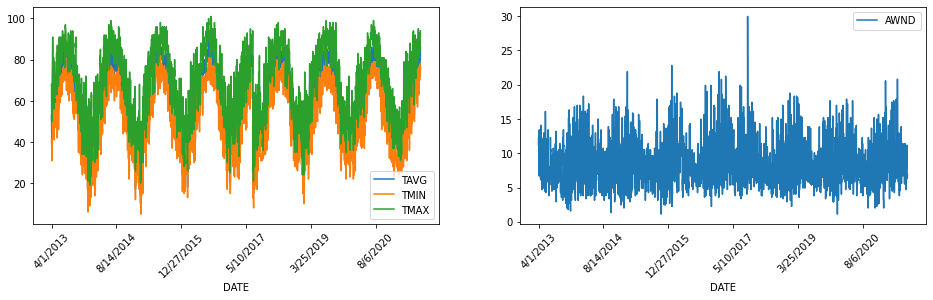

In [ ]:
weather_df = weather_data.toPandas()

_, axes = plt.subplots(1, 2, figsize=(16, 4))

weather_df.plot("DATE", ["TAVG", "TMIN", "TMAX"], ax=axes[0])
weather_df.plot("DATE", "AWND", ax=axes[1])

for ax in axes:
    ax.tick_params(axis='x', labelrotation=45)

In [ ]:
#read all the tables 
covid_df = spark.read.parquet("/content/gdrive/My Drive/Udacity/output_data/covid_data/")
covid_df.createOrReplaceTempView('covid')

stations_df = spark.read.parquet("/content/gdrive/My Drive/Udacity/output_data/station_data.parquet/")
stations_df.createOrReplaceTempView('stations')

trips_df = spark.read.parquet("/content/gdrive/My Drive/Udacity/output_data/trip_data.parquet/")
trips_df.createOrReplaceTempView('trips')

weather_df = spark.read.parquet("/content/gdrive/My Drive/Udacity/output_data/weather_data/")
weather_df.createOrReplaceTempView('weather')


In [ ]:
covid_df.agg({'death': 'max'}).show()


+----------+
|max(death)|
+----------+
|      1030|
+----------+



In [ ]:
query_df = spark.sql("""
SELECT date, death, positive
FROM covid
WHERE death=1030;
""").show()

+----------+-----+--------+
|      date|death|positive|
+----------+-----+--------+
|2021-03-06| 1030|   41273|
|2021-03-07| 1030|   41419|
+----------+-----+--------+



In [ ]:
query_df = spark.sql("""
SELECT date, death, positive
FROM covid
ORDER by death DESC;
""").show()

+----------+-----+--------+
|      date|death|positive|
+----------+-----+--------+
|2021-03-06| 1030|   41273|
|2021-03-07| 1030|   41419|
|2021-03-05| 1027|   41122|
|2021-03-04| 1024|   41014|
|2021-03-03| 1023|   40818|
|2021-03-01| 1019|   40684|
|2021-03-02| 1019|   40767|
|2021-02-28| 1017|   40598|
|2021-02-27| 1010|   40478|
|2021-02-26| 1009|   40284|
|2021-02-25| 1005|   40122|
|2021-02-24| 1001|   39943|
|2021-02-23|  998|   39844|
|2021-02-21|  995|   39648|
|2021-02-22|  995|   39755|
|2021-02-20|  994|   39553|
|2021-02-19|  993|   39461|
|2021-02-18|  992|   39301|
|2021-02-17|  985|   39180|
|2021-02-16|  982|   39131|
+----------+-----+--------+
only showing top 20 rows



In [ ]:
query_df = spark.sql("""
SELECT date, death, positive
FROM covid
ORDER by positive DESC;
""").show()

+----------+-----+--------+
|      date|death|positive|
+----------+-----+--------+
|2021-03-07| 1030|   41419|
|2021-03-06| 1030|   41273|
|2021-03-05| 1027|   41122|
|2021-03-04| 1024|   41014|
|2021-03-03| 1023|   40818|
|2021-03-02| 1019|   40767|
|2021-03-01| 1019|   40684|
|2021-02-28| 1017|   40598|
|2021-02-27| 1010|   40478|
|2021-02-26| 1009|   40284|
|2021-02-25| 1005|   40122|
|2021-02-24| 1001|   39943|
|2021-02-23|  998|   39844|
|2021-02-22|  995|   39755|
|2021-02-21|  995|   39648|
|2021-02-20|  994|   39553|
|2021-02-19|  993|   39461|
|2021-02-18|  992|   39301|
|2021-02-17|  985|   39180|
|2021-02-16|  982|   39131|
+----------+-----+--------+
only showing top 20 rows



In [ ]:

query_df = spark.sql("""
SELECT s.station_id, s.station_name, t.ride_id, t.rideable_type
FROM stations as s
INNER JOIN trips as t 
ON s.station_id = t.start_station_id
WHERE s.station_id =  31007
LIMIT 10
;
""").show()


+----------+--------------------+-------+-------------+
|station_id|        station_name|ride_id|rideable_type|
+----------+--------------------+-------+-------------+
|     31007|Crystal City Metr...|   null|         null|
|     31007|Crystal City Metr...|   null|         null|
|     31007|Crystal City Metr...|   null|         null|
|     31007|Crystal City Metr...|   null|         null|
|     31007|Crystal City Metr...|   null|         null|
|     31007|Crystal City Metr...|   null|         null|
|     31007|Crystal City Metr...|   null|         null|
|     31007|Crystal City Metr...|   null|         null|
|     31007|Crystal City Metr...|   null|         null|
|     31007|Crystal City Metr...|   null|         null|
+----------+--------------------+-------+-------------+



In [ ]:
query_df = spark.sql("""
SELECT s.station_id, s.station_name, t.ride_id, t.rideable_type, c.date, c.death
FROM stations as s
INNER JOIN trips as t 
ON s.station_id = t.start_station_id
INNER JOIN covid as c 
ON t.start_date = c.date
WHERE s.station_id =  31007 and c.death>0
LIMIT 10
;
""").show()


+----------+--------------------+-------+-------------+----------+-----+
|station_id|        station_name|ride_id|rideable_type|      date|death|
+----------+--------------------+-------+-------------+----------+-----+
|     31007|Crystal City Metr...|   null|         null|2020-03-20|    1|
|     31007|Crystal City Metr...|   null|         null|2020-03-20|    1|
|     31007|Crystal City Metr...|   null|         null|2020-03-20|    1|
|     31007|Crystal City Metr...|   null|         null|2020-03-20|    1|
|     31007|Crystal City Metr...|   null|         null|2020-03-20|    1|
|     31007|Crystal City Metr...|   null|         null|2020-03-21|    1|
|     31007|Crystal City Metr...|   null|         null|2020-03-21|    1|
|     31007|Crystal City Metr...|   null|         null|2020-03-21|    1|
|     31007|Crystal City Metr...|   null|         null|2020-03-21|    1|
|     31007|Crystal City Metr...|   null|         null|2020-03-21|    1|
+----------+--------------------+-------+----------

In [ ]:
query_df = spark.sql("""
SELECT *
FROM weather as t
LIMIT 10
;
""").show()

+---------+-----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     DATE| AWND|PRCP|SNOW|TAVG|TMAX|TMIN| WT01| WT02| WT03| WT04| WT05| WT06| WT08| WT09| WT11| WT13| WT14| WT15| WT16| WT17| WT18| WT21| WT22|
+---------+-----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 4/1/2013|11.18| 0.0| 0.0|53.0|68.0|41.0|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|
| 4/2/2013| 12.3| 0.0| 0.0|45.0|51.0|39.0|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|
| 4/3/2013|11.41| 0.0| 0.0|44.0|54.0|33.0|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|false|
| 4/4/2013| 6.71|0.14| 0.0|40.0|50.0|31.0| true|false|false|false|false|false|false|false|false|false|false|false|false|false|fals

In [ ]:
query_df = spark.sql("""
SELECT *
FROM trips as t
LIMIT 10
;
""").show()


+-------+-------------+-------------------+-------------------+--------------+-------------+---+----------+----------------+
|ride_id|rideable_type|         started_at|           ended_at|end_station_id|member_casual|tid|start_date|start_station_id|
+-------+-------------+-------------------+-------------------+--------------+-------------+---+----------+----------------+
|   null|         null|2011-01-01 02:45:06|2011-01-01 02:49:44|         31110|       Member| 76|2011-01-01|           31200|
|   null|         null|2011-01-01 10:55:02|2011-01-01 12:34:14|         31201|       Casual|158|2011-01-01|           31200|
|   null|         null|2011-01-01 11:19:59|2011-01-01 11:23:39|         31221|       Member|169|2011-01-01|           31200|
|   null|         null|2011-01-01 11:34:00|2011-01-01 16:05:54|         31215|       Casual|186|2011-01-01|           31200|
|   null|         null|2011-01-01 11:35:25|2011-01-01 16:07:31|         31215|       Casual|187|2011-01-01|           31200|


In [ ]:
query_df = spark.sql("""
SELECT *
FROM stations
""").show()


+----------+--------------------+
|station_id|        station_name|
+----------+--------------------+
|     31007|Crystal City Metr...|
|     31920|Washington-Libert...|
|     31921|Westover Library ...|
|     32600|George Mason High...|
|     32601|State Theatre / P...|
|     32602|N Oak St & W Broa...|
|     31304|36th & Calvert St...|
|     31305|Connecticut Ave &...|
|     31306|39th & Calvert St...|
|     31307|3000 Connecticut ...|
|     32607|S Maple Ave & S W...|
|     32608|Falls Church City...|
|     32609|W Columbia St & N...|
|     32900|Motivate BX Tech ...|
|     31022|Clarendon Metro /...|
|     31023|Fairfax Dr & Wils...|
|     31024|Virginia Square M...|
|     31066|Columbia Pike & S...|
|     31067|Columbia Pike & S...|
|     31068|Columbia Pike & S...|
+----------+--------------------+
only showing top 20 rows

